![alt text](download.png)




![alt text](download-1.png)

![alt text](download-2.png)


__Imports__

In [151]:
import numpy as np              #Standardbibliothek für mathematische Berechnungen mit Arrays und Matrizen
#np.array([...])	erstellt ein numerisches Array
#np.linspace(a, b, n)	erzeugt n gleichmäßig verteilte Werte zwischen a und b
#np.exp(x)	berechnet e hoch x (Exponentialfunktion)
#np.log(x)	berechnet den natürlichen Logarithmus
#np.mean(x)	Mittelwert
#np.std(x)	Standardabweichung

import matplotlib.pyplot as plt #Plots, Achsen, Linien, Punkte, Legenden usw.
#plt.plot(x, y)	Zeichnet eine Linie
#plt.scatter(x, y)	Zeichnet Punkte
#plt.xlabel("Text")	Beschriftet die x-Achse
#plt.ylabel("Text")	Beschriftet die y-Achse
#plt.title("Titel")	Fügt dem Plot einen Titel hinzu
#plt.legend()	Zeigt die Legende an
#plt.grid(True)	Gitterlinien einblenden
#plt.show()	Zeigt den Plot im Fenster an
#plt.figure(figsize=(8,4))	Erstellt ein neues Plotfenster mit bestimmter Größe

#plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
#dass alles schön sichtbar bleibt

__Konverter__

In [152]:
#Konverter für Dezimalzahlen, bei denen das Trennzeichen ein Komma ist
def conv(x):
    return float(x.replace(',', '.'))

__Plottfunktionen__

In [153]:
def plottstart():
     plt.figure(figsize=(8,4))           #neuer Plott
     
def plottend(ueberschrift, xlabel, ylabel):
     # doppelte label vermeiden------------------------------------------
     # plt.getCurentAxes()
     #   Gibt die aktuelle Achse (das aktuelle Diagramm) zurück, auf der man zeichnet
     #   Rückgabe Objekt vom Typ matplotlib.axes._axes.Axes
     # .get_legend_handles_labels() liefert zwei Listen zurück: handles, labels
     handles, labels = plt.gca().get_legend_handles_labels()
     # zip(labels, handles) verbindet beide Listen paarweise: 
     #   [("Messpunkte", obj1), ("Messpunkte", obj2), ("Kennlinie", obj3)]
     # durch dict() wird das zu einem Dictionary umgewandelt: 
     #   doppelte Schlüssel („Messpunkte“) werden automatisch überschrieben,
     #   es bleibt nur ein Eintrag pro Label übrig
     by_label = dict(zip(labels, handles))
     # plt.legend(by_label.values(), by_label.keys()) Zeigt jetzt die Legende ohne doppelte Einträge an
     #.values = Plot-Objekte
     #.keys = Textbeschriftung
     plt.legend(by_label.values(), by_label.keys())
     #---------------------------------------------------------------
     plt.title(f"Oszilloskop-Messung {ueberschrift}")
     #Achsenbeschriftung
     plt.xlabel(f"{xlabel}")
     plt.ylabel(f"{ylabel}")
     plt.grid(True)
     plt.legend(loc='upper right')   #legende oben rechts
     #plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
     #dass alles schön sichtbar bleibt
     plt.tight_layout()
     plt.show()

![alt text](download-3.png)

__DatenEinlesen__

def datenAusEinerCsvDateiAuslesen(dateiname):           liest daten aus EINER Csv ein

def mittelUndEmpStdRechnen(t,u):                        rechnet aus einem eingabe-Array, u, uMittelwert und standardabweichung von u

def auslesenUndRechnen(dateiname):                      ruft die beiden obigen Funktionen auf

In [154]:
def datenAusEinerCsvDateiAuslesen(dateiname):
    data = np.genfromtxt(
        dateiname,              # Path zur Datei (Endung .csv)
        delimiter=';',                  # Zeilen Getrennt durch Semikolon
        skip_header=1000,               # erste 1000 Zeilen überspringen
        converters={0: conv, 1: conv},  # Nach dem vorhin festgelegten Konverter , durch . ersetzen
                                        # In beiden Spalten
        autostrip=True,                 # entfernt Leerzeichen um Werte herum
        max_rows = 200                  # Stichprobengröße ist 200
    )
    
    # Zeit und Spannung extrahieren (t und u sind np arrays)
    t = np.abs(data[:, 0])      # erste Spalte: Zeit
    u = data[:, 1]              # zweite Spalte: Spannung
    return t, u


In [155]:
def mittelUndEmpStdRechnen(t,u):
    # Mittelwert 
    spannungMittelwert = np.mean(u)  #sum(u)/len(u)
    
    # Standardabweichung
    standardAbweichungU = np.std(u)
    
    # Empirische Standardabweichung
    emstandardAbweichungU  = np.std(u, ddof=1)      # ddof=1 → delta degrees of freedom = 1
                                                    # ddof=1 bedeutet: teile durch n-1 => emp std
    return t, u, spannungMittelwert, standardAbweichungU, emstandardAbweichungU
    

In [156]:
def auslesenUndRechnen(dateiname):
    t,u = datenAusEinerCsvDateiAuslesen(dateiname=dateiname)
    t, u, uMittelwert, stdU, emstdU = mittelUndEmpStdRechnen(t,u)
    return t, u, uMittelwert, stdU, emstdU

In [157]:
def originalCsvPlott(ueberschrift, t, u,uMittelwert, stdU, emstdU):
    # daten plotten
    plottstart()
    #plott
    
    plt.plot(t, u, label='Signal', color='blue')
    # Mittelwert-Linie 
    # plt.axhline() gehört zu Matplotlib
    # und wird verwendet, um eine horizontale Linie in ein Diagramm zu zeichnen.
    plt.axhline(uMittelwert, 
                color='green', 
                linestyle='--', 
                label=f'Mittelwert = {uMittelwert:.3f} V')
    # Standardabweichungslinien
    plt.axhline(uMittelwert + stdU, 
                color='red', 
                linestyle='-', 
                label=f'std +1 = {uMittelwert + stdU:.3f} V')
    plt.axhline(uMittelwert - stdU, 
                color='red', 
                linestyle='-', 
                label=f'std -1 = {uMittelwert - stdU:.3f} V')
    
    # empirischeStandardabweichungslinien
    plt.axhline(uMittelwert + emstdU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd +1 = {uMittelwert + emstdU:.3f} V')
    plt.axhline(uMittelwert - emstdU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd -1 = {uMittelwert - emstdU:.3f} V')
    
    plottend(ueberschrift, "Zeit [s]", "Spannung [V]")

_Beispiel 10 cm Datei_

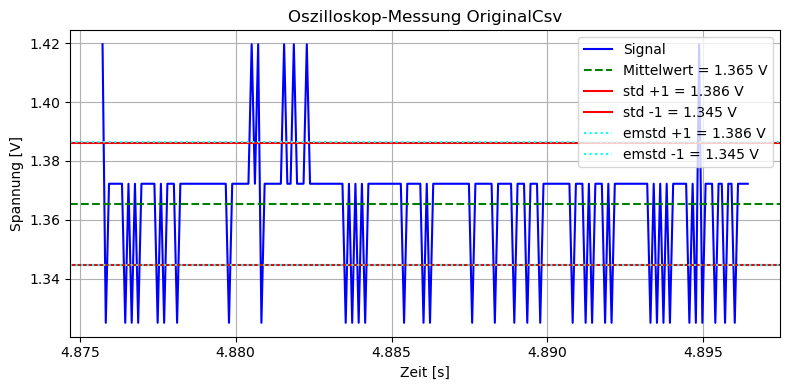

In [158]:
t, u, uMittelwert, stdU, emstdU = auslesenUndRechnen(f"Versuch1_10cm.csv")
originalCsvPlott("OriginalCsv", t, u,uMittelwert, stdU, emstdU)

![alt text](download-4.png)

__Vergleichen aller CM-Messungen mit den abgelesenen Mittelwerten__

handmesswerte = abgelesenen Mittelwerten in Reihenfolge der 21 cm Dateien

def verarbeiteAlleCmDateien():      
        return cmArr, uArr, uMittArr, emstdUArr         
        => erschafft Arrays die die Werte zu den cm Dateien enthalten
        => Array[i] = wert zu cm datei mit cm Wert[i]

def uebertragsfunktionPlott(ueberschrift, handmesswerte):               plotet die Übertragungsfunktion  

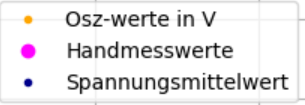                  



In [159]:
handmesswerte   = [1.364, 1.188, 1.071, 0.971, 0.875, 0.812, 
                   0.752, 0.696, 0.656, 0.614, 0.576, 0.533,
                   0.534, 0.518, 0.497, 0.494, 0.476, 0.458,
                   0.452, 0.433, 0.414]


In [160]:
def verarbeiteAlleCmDateien():
    cmArr = []
    uArr = []
    uMittArr = []
    emstdUArr = []
    for i in range(10, 71, 3): cmArr.append(i)
    
    for cm in cmArr:
        t, u, uMittelwert, stdU, emstdU = auslesenUndRechnen(f"Versuch1_{cm}cm.csv")
        uArr.append(u)
        uMittArr.append(uMittelwert)
        emstdUArr.append(emstdU)
    return cmArr, uArr, uMittArr, emstdUArr

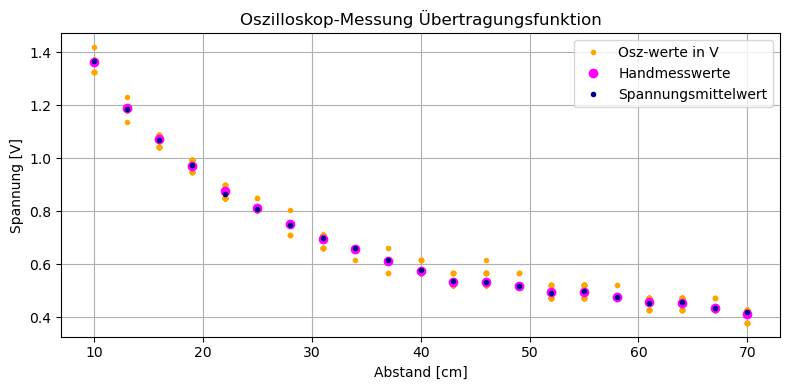

In [161]:
def uebertragsfunktionPlott(ueberschrift, handmesswerte):
    plottstart()
    cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()
    for i in range(len(cmArr)):
        for j in range(len(uArr)):
            #Nur im ersten Durchlauf label anhängen (plott Punktwolke originalwerte)
            if(j==0 and cmArr[i]==10):        
                plt.plot(cmArr[i], uArr[i][j], ".", color = "orange", label = 'Osz-werte in V')      
            else:
                plt.plot(cmArr[i], uArr[i][j], ".", color = "orange") 
        
        if (i==0):
            plt.plot(cmArr[i], handmesswerte[i], "o", color="magenta",label='Handmesswerte')
            plt.plot(cmArr[i], uMittArr[i],".", color='darkblue', label='Spannungsmittelwert')
            #plt.plot(cm, uM-emstd,".", color='orange', label=f"emstd -1σ: {(uM-stdu):.3f}") 
        else:    
            plt.plot(cmArr[i], handmesswerte[i], "o", color="magenta")
            plt.plot(cmArr[i], uMittArr[i],".", color='darkblue')
            #plt.plot(cm, uM-emstd,".", color='orange')
    
    plottend(ueberschrift, "Abstand [cm]", "Spannung [V]")
uebertragsfunktionPlott("Übertragungsfunktion", handmesswerte=handmesswerte)

![alt text](download-5.png)

![alt text](download-6.png)

__logarythmieren__

def logarythmier(eingang,ausgang):          logarythmiert das Eingangs- und das AusgangsArray

def logAllCm():                             logarythmiert cmArr, uArr und uMittArr aller CM Dateien
    
    return logXArr, logYArr, np.log(uMittArr)

def plottlogAllcm(optionalOriginal=0):      plotet die logarythmierten Werte und bei Übergabe von 1 die originalwerte dazu 

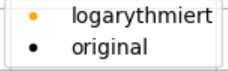


In [162]:
def logarythmier(eingang,ausgang):
    xArr=eingang
    yArr=ausgang
    logXArr =[]
    logYArr =[]
    for x in xArr:logXArr.append(np.log(x))
    for y in yArr:logYArr.append(np.log(y))
    return logXArr, logYArr

In [163]:
def logAllCm():   
    cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()
    logXArr, logYArr = logarythmier(eingang= uArr, ausgang= cmArr)
    return logXArr, logYArr, np.log(uMittArr)

In [164]:
def plottlogAllcm(optionalOriginal=0):
    plottstart()
    logXArr, logYArr, logUMittArr =logAllCm()
    for i in range(len(logYArr)):
        xWerte = logXArr[i]
        yWert = logYArr[i]
        for j in range(len(logXArr[i])):
            if(i==0 and j==0):
                plt.plot(xWerte[j], yWert, ".", color="orange", label= 'logarythmiert')
            else:
                plt.plot(xWerte[j], yWert, ".", color="orange")
    
    if(optionalOriginal==1):
        #optional original dazu
        cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()
        for i in range(len(cmArr)):
            xWerte = uArr[i]
            yWert = cmArr[i]
            for j in range(len(uArr[i])):
                if(i==0 and j==0):
                    plt.plot(xWerte[j], yWert, ".", color="black", label= 'original')
                else:
                    plt.plot(xWerte[j], yWert, ".", color="black")
    
    plottend("Logarythmus Aller CM Dateien","x'","y'")

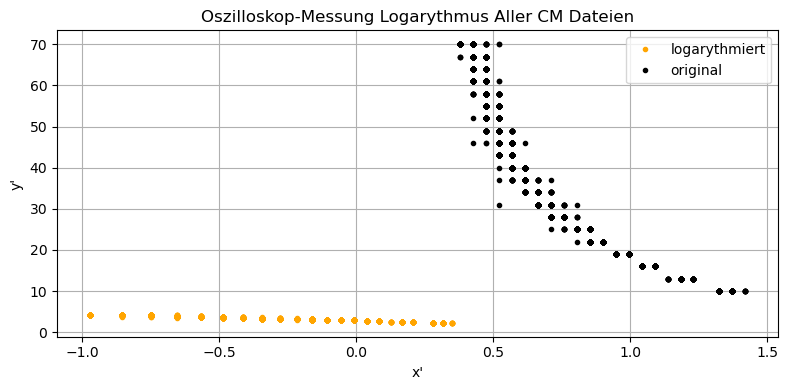

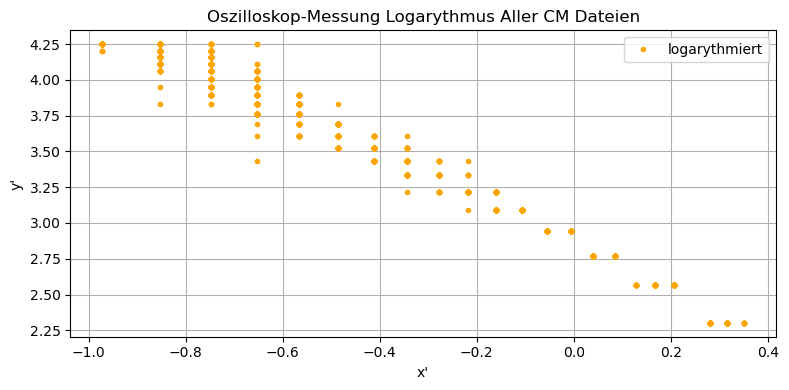

In [165]:
plottlogAllcm(1)
plottlogAllcm()

![alt text](download-7.png)

![alt text](download-8.png)

__Lineare Regression__

def lineareRegression(plott=0):    berechnet die regression und plottet sie nur bei Übergabe von 1

 return logUMittArr, logCmArr, geradeY, a, b

In [166]:
def lineareRegression(plott=0):
    # Alle Messdaten laden
    cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()

    logUArr, logCmArr, logUMittArr =logAllCm()

    # Arrays für alle Einzelmesspunkte (zum Plotten)
    #x-Werte: alle Spannungen (U)
    x_all = np.concatenate(logUArr)
    #y-Werte: die dazugehörigen Abstände (cm) – aber wiederholt, so oft wie du Spannungen pro cm hast.
    #zip(uArr, cmArr) bildet Paare wie: ( [0.9, 0.8, 0.85], 1 )
    #np.full(len(u), np.log(cm))
    #   erzeugt ein NumPy-Array, das len(u)-mal denselben Wert enthält — nämlich log(cm)
    y_all = np.concatenate([np.full(len(u), np.log(cm)) for u, cm in zip(uArr, cmArr)])

    # Mittelwerte berechnen
    xM = np.mean(logUMittArr)
    yM = np.mean(logCmArr)

    # Summen bilden für Regression
    summ_oben = np.sum((logUMittArr - xM) * (logCmArr - yM))
    summ_unten = np.sum((logUMittArr - xM) ** 2)

    # Regressionsparameter
    a = summ_oben / summ_unten
    b = yM - a * xM

    # Ausgabe
    print(f"a = {a:.4f}, b = {b:.4f}")
    print(f"Potenzfunktion: y = e^{b:.4f} * x^{a:.4f}")

    # Ausgleichsgerade berechnen
    geradeY = a * logUMittArr + b
    if(plott==1):
        # Plot
        plottstart()
        plt.plot(x_all, y_all, ".", color='blue', label="Messpunkte (log)")
        plt.plot(logUMittArr, geradeY, "-", color="green",
                label=f"Ausgleichsgerade (y'={b:.2f}+{a:.2f}·x')")

        plottend("Lineare Regression", "log(U)", "log(cm)")

    # Rückgabe der Werte (wie im Rest deines Projekts)
    return logUMittArr, logCmArr, geradeY, a, b

a = -1.6022, b = 2.8514
Potenzfunktion: y = e^2.8514 * x^-1.6022


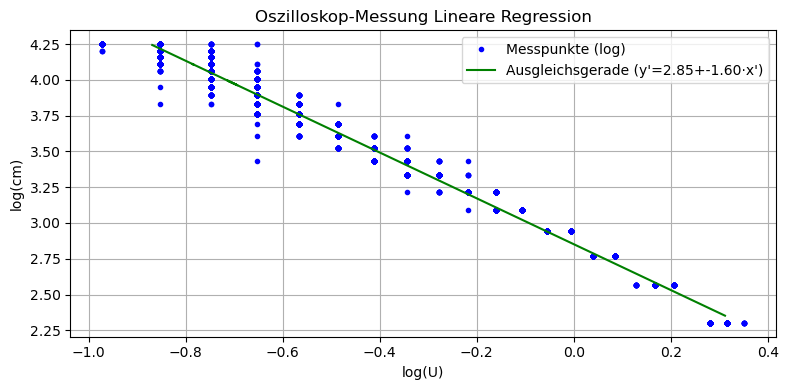

In [167]:
logUMittArr, logCmArr, geradeY, a, b = lineareRegression(plott=1)

![alt text](download-9.png)

__Rückrechnung__

y, x_all=rueckrechnungCm(a, b): rechnet die Werte zurück auf Original mit Hilfe der übergebenen Parameter die zuvor mit lininearerRegression() berechnet werden müssen.

In [168]:
def rueckrechnungCm(a, b):
    # Alle Messdaten laden
    cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()

    # Alle Spannungen und zugehörigen Abstände zu flachen Arrays kombinieren
    #x-Werte: alle Spannungen (U)
    x_all = np.concatenate(uArr)  # Spannungen (V)
    #y-Werte: die dazugehörigen Abstände (cm) – aber wiederholt, so oft wie du Spannungen pro cm hast.
    #zip(uArr, cmArr) bildet Paare wie: ( [0.9, 0.8, 0.85], 1 )
    #[cm] * len(u)
    # erstellt eine Liste, in der der Abstand cm so oft wiederholt wird, wie Spannungen in u enthalten sind.
    y_all = np.concatenate([[cm] * len(u) for cm, u in zip(cmArr, uArr)])  # Abstände (cm)

    # Rückrechnung: Abstand = e^b * U^a
    y = np.exp(b) * (x_all ** a)

    # Fit-Kurve für glatten Verlauf
    x_glatt = np.linspace(min(x_all), max(x_all), 300)
    y_glatt = np.exp(b) * (x_glatt ** a)

    # Beispielhafte Rückrechnungsausgabe
    print(f"Für {np.mean(x_all):.3f} V → berechneter Abstand: {np.mean(y):.3f} cm")

    # Plot starten
    plottstart()

    # Messpunkte
    plt.plot(x_all, y_all, ".", color="blue", label="Messpunkte")
    # Rückgerechnete Punkte
    plt.plot(x_all, y, ".", color="cyan", label="Rückrechnung (Punkte)")
    # Glatte Fitlinie
    plt.plot(x_glatt, y_glatt, "-", color="cyan", label=f"Fit: y = e^{b:.2f} · x^{a:.2f}")

    # doppelte Labels vermeiden
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Achsen & Titel
    plottend("Oszilloskop-Messung Rückrechnung", "Spannung [V]", "Abstand [cm]")

    return y, x_all


a = -1.6022, b = 2.8514
Potenzfunktion: y = e^2.8514 * x^-1.6022
Für 0.685 V → berechneter Abstand: 40.121 cm


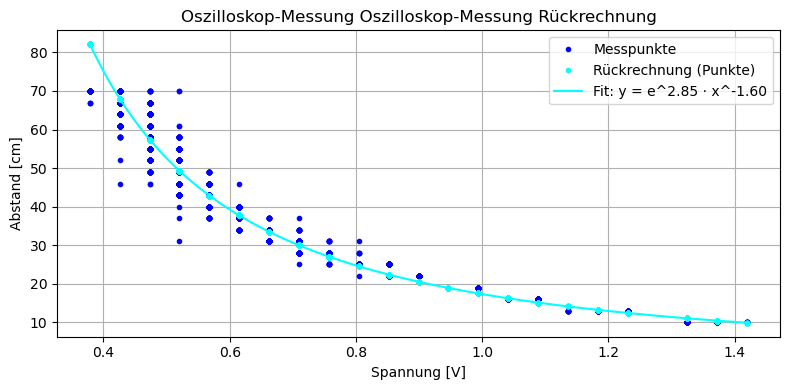

In [169]:
logUMittArr, logCmArr, geradeY, a, b = lineareRegression()
y, x_all=rueckrechnungCm(a, b)


![alt text](download-10.png)

C:\Users\Nikita\Desktop\Technische Grundlagen der KI\Labor1\Versuch1_DINA4_LAENGE.csv

![alt text](download-11.png)

 __Problem:__
    Der wahre Wert ist unbekannt, d.h. der Fehler oder der wahre Wert muss geschätzt werden, üblicherweise durch mehrfache Messung.
    Als Schätzwert für den wahren Wert xw wird das arithmetische Mittel x aus den Einzelmesswerten xi verwendet.

__Messfehler__

def messfehlerErmittlung(dateipfad): ermittelt Fehler, den Vertrauensbereich und stellt diese, sowie die gemessene Spannung dar

In [170]:
def messfehlerErmittlung(dateipfad):
    x_all = []
    sumu = 0
    t, u, uM, stdu, emstd = auslesenUndRechnen(dateipfad)
    for z in range(len(u)):
        x_all.append(u[z])

    arythmetischesMittel = uM
    wahresX = arythmetischesMittel
    klammersumme = 0
    n = len(x_all)
    absoluterFehlerArr = []

    for gemessenX in x_all:
        absoluterFehler = gemessenX - wahresX
        absoluterFehlerArr.append(absoluterFehler)
        
        klammer = (arythmetischesMittel - gemessenX) ** 2
        klammersumme += klammer

    empirischeStandardAbweichung = np.sqrt(klammersumme / (n - 1))
    wegenEinzelwertenVerringerteEmpirischeStandardAbweichung = empirischeStandardAbweichung / np.sqrt(n)

    print("Vertrauensbereich:")
    print(f"68% == {wegenEinzelwertenVerringerteEmpirischeStandardAbweichung:.3f}")
    print(f"95% == {2 * wegenEinzelwertenVerringerteEmpirischeStandardAbweichung:.3f}\n")
    print("x = xMittel ± t·s_xMittel cm")
    print(f"{gemessenX:.3f} = {arythmetischesMittel:.3f} ± t·{wegenEinzelwertenVerringerteEmpirischeStandardAbweichung:.3f}\n")

    return u, arythmetischesMittel, empirischeStandardAbweichung, wegenEinzelwertenVerringerteEmpirischeStandardAbweichung, absoluterFehlerArr
u, uMittelwert, emstd, verremstd, absoluterFehlerArr =messfehlerErmittlung("Versuch1_DINA4_LAENGE.csv")

Vertrauensbereich:
68% == 0.001
95% == 0.002

x = xMittel ± t·s_xMittel cm
0.710 = 0.711 ± t·0.001



![alt text](download-13.png)

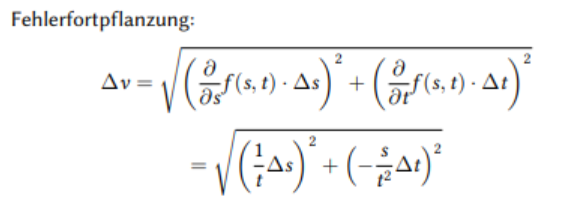

In [171]:
def fehlerfortpflanzung(dateiname):
    logUMittArr, logCmArr, geradeY, a, b = lineareRegression()
    u, uMittelwert, emstd, verremstd, absoluterFehlerArr  = messfehlerErmittlung(dateiname)
    fehlerU = verremstd
    y = np.exp(b) * (uMittelwert ** a)
    fehlerY = abs(a) * np.exp(b) * (uMittelwert ** (a - 1)) * fehlerU

    t = 2  # für 95%
    print(f"Abstand s = {y:.2f} ± {t*fehlerY:.2f} cm")
    return fehlerY, y

fehlerfortpflanzung("Versuch1_DINA4_LAENGE.csv")


a = -1.6022, b = 2.8514
Potenzfunktion: y = e^2.8514 * x^-1.6022
Vertrauensbereich:
68% == 0.001
95% == 0.002

x = xMittel ± t·s_xMittel cm
0.710 = 0.711 ± t·0.001

Abstand s = 29.89 ± 0.11 cm


(np.float64(0.054920926678342884), np.float64(29.889215271018227))

![alt text](download-14.png)

In [172]:
def flaechenmessung():
    fehlerL, L = fehlerfortpflanzung("Versuch1_DINA4_LAENGE.csv")
    fehlerB, B = fehlerfortpflanzung("Versuch1_DINA4_BREITE.csv")

    A = L * B
    dA = np.sqrt((B * fehlerL)**2 + (L * fehlerB)**2)
    t = 2  # für 95%

    print("\nFlächenmessung (DIN-A4):")
    print(f"Länge  L = {L:.2f} ± {t*fehlerL:.2f} cm")
    print(f"Breite B = {B:.2f} ± {t*fehlerB:.2f} cm")
    print(f"Fläche A = {A:.2f} ± {t*dA:.2f} cm²")


flaechenmessung()


a = -1.6022, b = 2.8514
Potenzfunktion: y = e^2.8514 * x^-1.6022
Vertrauensbereich:
68% == 0.001
95% == 0.002

x = xMittel ± t·s_xMittel cm
0.710 = 0.711 ± t·0.001

Abstand s = 29.89 ± 0.11 cm
a = -1.6022, b = 2.8514
Potenzfunktion: y = e^2.8514 * x^-1.6022
Vertrauensbereich:
68% == 0.001
95% == 0.003

x = xMittel ± t·s_xMittel cm
0.899 = 0.893 ± t·0.001

Abstand s = 20.77 ± 0.10 cm

Flächenmessung (DIN-A4):
Länge  L = 29.89 ± 0.11 cm
Breite B = 20.77 ± 0.10 cm
Fläche A = 620.68 ± 3.81 cm²


 DIN-A4 Blatt
 
 Länge = 29,7 cm

 Breite = 21,0 cm 

 Fläche = 624 cm²